Mikko Peltola

---
# Methods 3 - Decision tree

---
## Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import graphviz

---
## Loading data

In [2]:
df = pd.read_csv("C:\\Users\\micromikko\\AnacondaProjects\\data\\phishing.csv", sep=";")
print("df shape:", df.shape)

df shape: (11055, 31)


---
## Target column separated from other data
Also, column names are stored in a variable for later use.

In [3]:
x = df.drop("Result", axis=1)
y = df["Result"]

print("x shape:", x.shape)
print("t shape:", y.shape)

column_names = list(x)

x shape: (11055, 30)
t shape: (11055,)


---
## Splitting data into training and validation sets
The data set is split with a train/validation ratio of 80/20 and shuffled.

In [4]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, shuffle=True)

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape, "\n")
print("x_val shape:", x_val.shape)
print("y_val shape:", y_val.shape)

x_train shape: (8844, 30)
y_train shape: (8844,) 

x_val shape: (2211, 30)
y_val shape: (2211,)


---
## Creating the classifier and training the model
A maximum depth of 3 was selected in order to keep the resulting tree manageable, 
as even a depth of 4 produces a rather large tree with twice the amount of nodes
as one with a depth of 3.<br>

In [5]:
classifier = DecisionTreeClassifier(splitter="best", max_depth=5, class_weight="balanced", min_samples_leaf=50, min_impurity_decrease=0.01)
result = classifier.fit(x_train, y_train)

---
## Predicting results using the validation data x_val

In [6]:
y_pred = classifier.predict(x_val)

---
## Accuracy estimate of decision tree

Even with a tree depth of 1, an accuracy of over 85% was achieved with 
SSLfinal_State being most crucial out of all variables. If the tree depth limit
was removed, the maximum accuracy peaked at roughly 97% if no other parameters
were changed, but this of course provided a model that was grossly overfitted to 
the data.<br><br>

A tree depth of 3 was ultimately chosen, because it consistently provides a model
with over 90% accuracy. It also leaves enough room to generalize well to new data, 
which must ultimately be the purpose of a model. This is especially true since 
the model is to be used as a tool in a working environment by an analyst to help 
with threat assesments. It can provide guidance, but ultimately it is up to 
the expert to make the decision.<br><br>
Also, instructions are best kept simple and short enough to facilitate understanding.

In [7]:
acc = accuracy_score(y_val, y_pred)
acc_rounded = round(acc, 4) * 100
print("Accuracy of model:", acc_rounded, "%\n")

conf_matrix = confusion_matrix(y_val, y_pred)
print("Confusion matrix:\n", conf_matrix)

Accuracy of model: 91.04 %

Confusion matrix:
 [[ 857   99]
 [  99 1156]]


---
## Graphing model

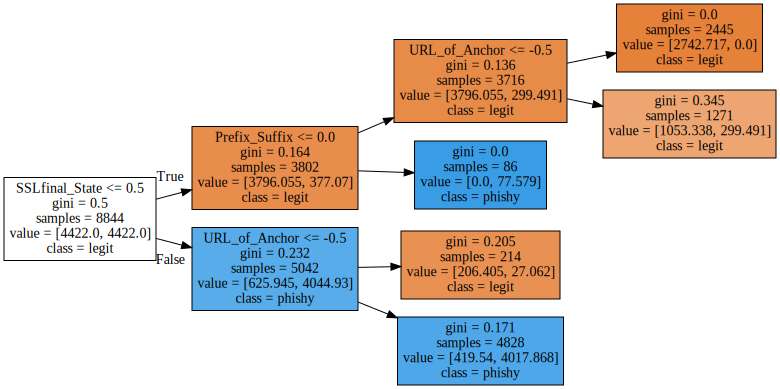

In [8]:
status = ["legit", "phishy"]
graafi = tree.export_graphviz(classifier, out_file=None, feature_names=column_names, class_names=status, label="all", rotate=True, proportion=False, filled=True)
graph = graphviz.Source(graafi)
graph

---
## Instructions
Adhering to the following steps will help you avoid roughly 90% of phishing sites. However, note that while providing a solid framework for phishing detection, case by case evaluation is always required. Use it as a rule of thumb rather than a strict and comprehensive guide.<br><br>

If the SSL certificate of the website is over 1 year old and trusted, and less than 31% of its anchor-tags connect to other domains, the website is most probably free of phishing. However, if the anchors direct to other domains more than 31% of the time and the domain name is hyphenated, caution is advised. Unhyphenated cases tend to be safer.<br><br>

If the SSL certificate is not trusted and over a year old, once again proceed to checking the anchors of the web site. Sites that direct to other domains infrequently (once again under 31%) are far less likely to to be phishing sites than those with more frequent uses of off-site directions in anchors.

- SSL certificate trusted and over 1 year old
	- YES:Under 31% of anchor-tags are directed to other sites
		- YES: probably safe site
		- NO: URL contains hyphen
				- YES: probably phishing
				- NO: probably safe
	- NO: Under 31% of anchor-tags are directed to other sites
		-YES: probably safe site
		- NO: probably phishing site